### Data Visualization

#### Import data

In [17]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display Setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

# Modelling
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

# Metric evaluation
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [5]:
df = pd.read_csv(r'C:\Users\User\Downloads\VIX week 4\train_clean.csv')
df.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,AGE,YEARS_EMPLOYED,YEARS_ID,YEARS_ID_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_6,YEARS_LAST_PHONE_CHANGE
0,0,Payment Difficulties,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.262949,0.139376,25,1,5,9,1,0,0,3.0
1,2,No Payment Difficulties,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,52,0,6,11,0,0,0,2.0
2,5,No Payment Difficulties,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.354225,0.621226,46,4,1,13,1,0,0,6.0
3,6,No Payment Difficulties,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.724000,0.492060,37,8,1,3,0,0,0,4.0
4,7,No Payment Difficulties,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.714279,0.540654,51,1,6,12,1,0,0,2.0


In [9]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [11]:
target_grp = (df[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,No Payment Difficulties,225964
1,Payment Difficulties,19059


In [13]:
grp = df['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

,index,TARGET
0,No Payment Difficulties,0.922215
1,Payment Difficulties,0.077785


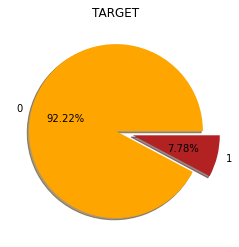

In [15]:
label = ('0', '1')
color = ('orange','firebrick')
explode = (0, 0.2)

plt.title('TARGET')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Ada 92% pinjaman yang setara dengan sekitar 282K dengan TARGET = 0, yang menunjukkan bahwa klien tidak memiliki masalah dalam membayar kembali pinjaman dalam waktu tertentu. Sementara hanya 8% dari total pinjaman (sekitar 24 ribu pelamar) dalam dataset ini melibatkan klien yang mengalami masalah dalam membayar kembali pinjaman.

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

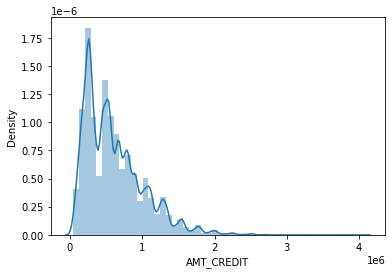

In [19]:
sns.distplot(df['AMT_CREDIT'])

In [24]:
print('Jumlah kredit macet: ', df[df['TARGET']=='Payment Difficulties']['AMT_CREDIT'].sum())
print('Jumlah kredit keseluruhan: ',df['AMT_CREDIT'].sum())
print('Rasio jumlah kredit macet terhadap keseluruhan kredit: ',round(df[df['TARGET']== 'Payment Difficulties']['AMT_CREDIT'].sum()/df['AMT_CREDIT'].sum()*100,1),"%")

Jumlah kredit macet:  10825542936.0
Jumlah kredit keseluruhan:  148954780939.5
Rasio jumlah kredit macet terhadap keseluruhan kredit:  7.3 %


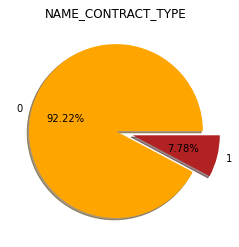

In [25]:
label = ('0', '1')
color = ('orange','firebrick')
explode = (0, 0.2)

plt.title('NAME_CONTRACT_TYPE')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

### Profile, Pekerjaan, dan Instansi

#### Gender

In [41]:
bygender=df.groupby('CODE_GENDER')

In [42]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [43]:

pd.DataFrame(bygender['AMT_CREDIT'].sum()).reset_index()

,CODE_GENDER,AMT_CREDIT
0,Female,9.782772e+10
1,Male,5.112706e+10


In [44]:

pd.DataFrame(bygender['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
CODE_GENDER,,,
Female,TARGET,93.197504,6.802496
Male,TARGET,90.287328,9.712672


#### Tinggkat penddikan

In [46]:
byEducation=df.groupby('NAME_EDUCATION_TYPE')

#### Jumlah Pinjaman

,NAME_EDUCATION_TYPE,AMT_CREDIT
4,Secondary / secondary special,1.000294e+11
1,Higher education,4.281719e+10
2,Incomplete higher,4.589294e+09
3,Lower secondary,1.421933e+09
0,Academic degree,9.694690e+07


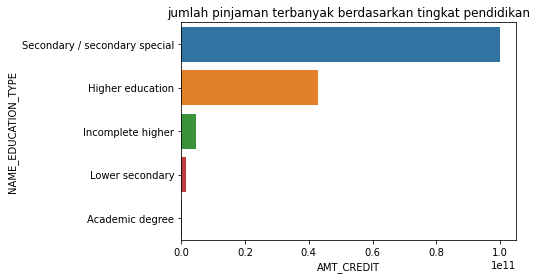

In [47]:
sns.barplot(y='NAME_EDUCATION_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byEducation['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
# plt.xticks(rotation=45)
plt.title('jumlah pinjaman terbanyak berdasarkan tingkat pendidikan')
pd.DataFrame(byEducation['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)


#### Jumlah Kasus

,TARGET,No Payment Difficulties,Payment Difficulties
NAME_EDUCATION_TYPE,,,
Academic degree,TARGET,97.794118,2.205882
Higher education,TARGET,94.673214,5.326786
Incomplete higher,TARGET,91.736695,8.263305
Lower secondary,TARGET,89.499648,10.500352
Secondary / secondary special,TARGET,91.406938,8.593062


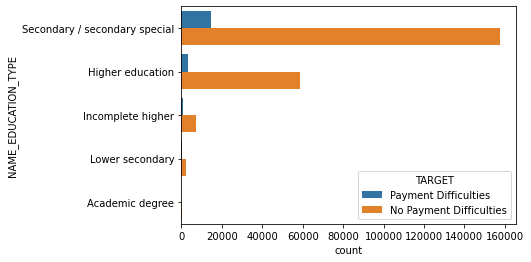

In [50]:
sns.countplot(y=df['NAME_EDUCATION_TYPE'],hue=df['TARGET'])
pd.DataFrame(byEducation['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

#### Status keluarga

In [51]:
byFamStat=df.groupby('NAME_FAMILY_STATUS')

#### Jumlah Pinjaman

,NAME_FAMILY_STATUS,AMT_CREDIT
1,Married,1.035554e+11
3,Single / not married,1.758135e+10
0,Civil marriage,1.244875e+10
2,Separated,8.997383e+09
4,Widow,6.371924e+09


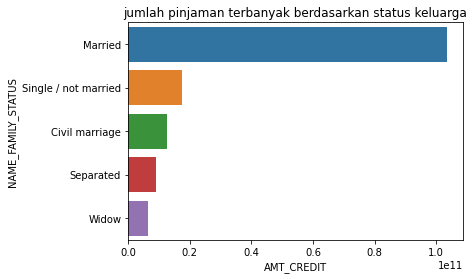

In [52]:
sns.barplot(y='NAME_FAMILY_STATUS', x='AMT_CREDIT',data=pd.DataFrame(byFamStat['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')

plt.title('jumlah pinjaman terbanyak berdasarkan status keluarga')
pd.DataFrame(byFamStat['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

#### Jumlah Kasus

,TARGET,No Payment Difficulties,Payment Difficulties
NAME_FAMILY_STATUS,,,
Civil marriage,TARGET,90.419825,9.580175
Married,TARGET,92.609855,7.390145
Separated,TARGET,92.194697,7.805303
Single / not married,TARGET,90.765403,9.234597
Widow,TARGET,94.477379,5.522621


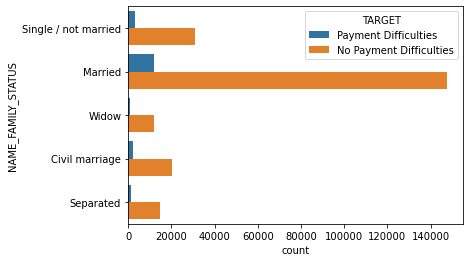

In [54]:
sns.countplot(y=df['NAME_FAMILY_STATUS'],hue=df['TARGET'])
pd.DataFrame(byFamStat['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

#### Umur

In [56]:
df['age_bin']=pd.cut(df['AGE'],5)
byAge=df.groupby('age_bin')

##### JUmlah pinjaman

,age_bin,AMT_CREDIT
1,"(30.6, 40.2]",4.170146e+10
2,"(40.2, 49.8]",3.683012e+10
3,"(49.8, 59.4]",3.597885e+10
0,"(20.952, 30.6]",1.943075e+10
4,"(59.4, 69.0]",1.501360e+10


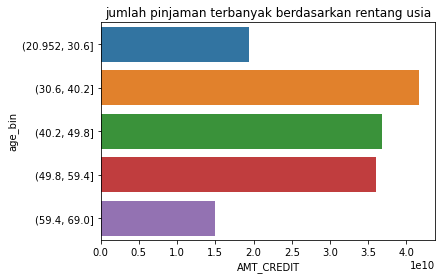

In [57]:
sns.barplot(y='age_bin', x='AMT_CREDIT',data=pd.DataFrame(byAge['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan rentang usia')
pd.DataFrame(byAge['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

#### Jumlah Kasus

In [58]:
pd.DataFrame(byAge['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
age_bin,,,
"(20.952, 30.6]",TARGET,88.760369,11.239631
"(30.6, 40.2]",TARGET,91.025052,8.974948
"(40.2, 49.8]",TARGET,92.600170,7.399830
"(49.8, 59.4]",TARGET,94.171979,5.828021
"(59.4, 69.0]",TARGET,95.271200,4.728800


jumlah nasabah yang mengajukan pinjaman paling banyak berada pada kisaran 30-40 tahun, diikuti nasabah pada kisaran 40-45 tahun. Sementara itu, jumlah pelamar untuk klien berusia <25 tahun atau usia >65 tahun sangat sedikit.

Klien yang mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan klien yang berusia 60-70 tidak terlalu banyak yang kesulitan

 #### Kepemilikan mobil¶

In [70]:
byFlag_owncar = df.groupby('FLAG_OWN_CAR')

#### Jumlah pinjaman

,FLAG_OWN_CAR,AMT_CREDIT
0,N,9.153759e+10
1,Y,5.741719e+10


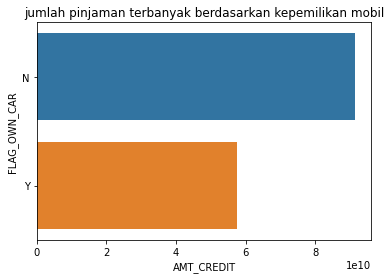

In [61]:
sns.barplot(y='FLAG_OWN_CAR', x='AMT_CREDIT',data=pd.DataFrame(byFlag_owncar['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan kepemilikan mobil')
pd.DataFrame(byFlag_owncar['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

#### Jumlah kasus

In [62]:
pd.DataFrame(byFlag_owncar['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
FLAG_OWN_CAR,,,
N,TARGET,91.828097,8.171903
Y,TARGET,92.952081,7.047919


### kepemilikan harta tak gerak

##### Jumlah Pinjaman

In [67]:
byFlag_ownreal = df.groupby('FLAG_OWN_REALTY')

pd.DataFrame(byFlag_ownreal['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

,FLAG_OWN_REALTY,AMT_CREDIT
1,Y,1.010921e+11
0,N,4.786266e+10


##### Jumlah kasus

In [68]:
pd.DataFrame(byFlag_ownreal['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
FLAG_OWN_REALTY,,,
N,TARGET,91.951284,8.048716
Y,TARGET,92.342005,7.657995


### Tipe Rumah

##### Jumlah Pinjaman

,NAME_HOUSING_TYPE,AMT_CREDIT
1,House / apartment,1.339586e+11
5,With parents,5.838666e+09
2,Municipal apartment,5.356854e+09
4,Rented apartment,1.944708e+09
3,Office apartment,1.312134e+09
0,Co-op apartment,5.437744e+08


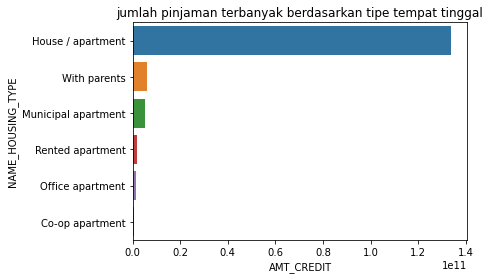

In [73]:
byHousing = df.groupby('NAME_HOUSING_TYPE')
sns.barplot(y='NAME_HOUSING_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byHousing['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan tipe tempat tinggal')
pd.DataFrame(byHousing['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

##### Jumlah kasus

In [77]:
pd.DataFrame(byFlag_ownreal['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
FLAG_OWN_REALTY,,,
N,TARGET,91.951284,8.048716
Y,TARGET,92.342005,7.657995


### Jumlah Anak

##### jumlah pinjaman

In [81]:
byChild=df.groupby('CNT_CHILDREN')
pd.DataFrame(byChild['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)


,CNT_CHILDREN,AMT_CREDIT
0,0,1.036618e+11
1,1,2.977156e+10
2,2,1.339192e+10
3,3,1.864165e+09
4,4,2.083947e+08
5,5,3.914528e+07
6,6,8.353305e+06
7,7,2.630826e+06
13,14,2.499210e+06
9,9,1.166571e+06


In [82]:
## Stack unStack
pd.DataFrame(byChild['TARGET'].value_counts(normalize=True)).stack().unstack(1).fillna(0)

,TARGET,No Payment Difficulties,Payment Difficulties
CNT_CHILDREN,,,
0,TARGET,0.925884,0.074116
1,TARGET,0.913611,0.086389
2,TARGET,0.916655,0.083345
3,TARGET,0.902415,0.097585
4,TARGET,0.878419,0.121581
5,TARGET,0.900000,0.100000
6,TARGET,0.750000,0.250000
7,TARGET,1.000000,0.000000
8,TARGET,1.000000,0.000000


#### Distribusi cicilan terhadap income total

In [84]:
ratio_credit=df['AMT_ANNUITY']/df['AMT_INCOME_TOTAL']*100

Text(0.5, 1.0, 'rasio utang dengan pendapatan total')

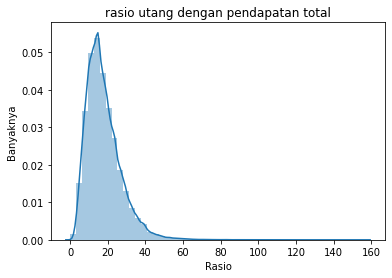

In [85]:
sns.distplot(ratio_credit)
plt.xlabel('Rasio')
plt.ylabel('Banyaknya')
plt.title('rasio utang dengan pendapatan total')

In [89]:
df['ratio_credit']=ratio_credit
df[df['ratio_credit']>100]['CODE_GENDER'].value_counts()

Female    23
Male       1
Name: CODE_GENDER, dtype: int64

In [91]:
df['ratio_cr']=pd.cut(ratio_credit,bins=4)

In [95]:
byCrerat=df.groupby('ratio_cr')
crerat=pd.DataFrame(byCrerat['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)
display(crerat)


,TARGET,No Payment Difficulties,Payment Difficulties
ratio_cr,,,
"(-0.135, 39.282]",TARGET,92.208975,7.791025
"(39.282, 78.541]",TARGET,92.651515,7.348485
"(78.541, 117.801]",TARGET,93.700787,6.299213
"(117.801, 157.06]",TARGET,88.888889,11.111111


####  jumlah pinjaman terbanyak berdasarkan Pekerjaan dan instansi bekerja

In [97]:
byOrg=df.groupby('ORGANIZATION_TYPE')

##### Jumlah pinjaman

In [101]:
pd.DataFrame(byOrg['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

,ORGANIZATION_TYPE,AMT_CREDIT
5,Business Entity Type 3,3.394748e+10
57,XNA,2.411370e+10
42,Self-employed,1.715681e+10
33,Other,8.399843e+09
30,Medicine,5.879363e+09
11,Government,5.410176e+09
4,Business Entity Type 2,5.305231e+09
39,School,4.698989e+09
51,Trade: type 7,3.663103e+09
28,Kindergarten,3.403176e+09


#### Jumlah kasus

In [105]:
plt.figure(figsize=(10,6))
pd.DataFrame(byOrg['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
ORGANIZATION_TYPE,,,
Advertising,TARGET,91.091954,8.908046
Agriculture,TARGET,90.557940,9.442060
Bank,TARGET,95.199232,4.800768
Business Entity Type 1,TARGET,91.816327,8.183673
Business Entity Type 2,TARGET,91.689342,8.310658
Business Entity Type 3,TARGET,90.914367,9.085633
Cleaning,TARGET,91.133005,8.866995
Construction,TARGET,88.649481,11.350519
Culture,TARGET,95.364238,4.635762


<Figure size 720x432 with 0 Axes>

#### Jenis Pekerjaan

In [107]:
byOccu=df.groupby('OCCUPATION_TYPE')

,OCCUPATION_TYPE,AMT_CREDIT
8,Laborers,2.528252e+10
3,Core staff,1.439055e+10
14,Sales staff,1.391744e+10
10,Managers,1.390954e+10
4,Drivers,9.025430e+09
6,High skill tech staff,6.049297e+09
0,Accountants,5.836028e+09
11,Medicine staff,4.424604e+09
16,Security staff,2.965030e+09
2,Cooking staff,2.543543e+09


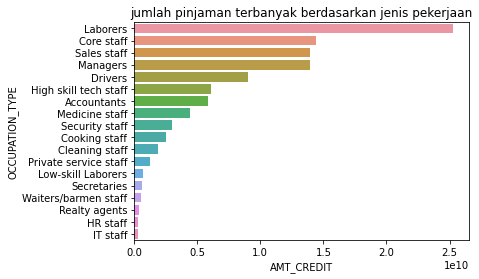

In [108]:
sns.barplot(y='OCCUPATION_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byOccu['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan jenis pekerjaan')
pd.DataFrame(byOccu['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

In [113]:
pd.DataFrame(byOccu['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

,TARGET,No Payment Difficulties,Payment Difficulties
OCCUPATION_TYPE,,,
Accountants,TARGET,95.189130,4.810870
Cleaning staff,TARGET,90.762061,9.237939
Cooking staff,TARGET,89.644779,10.355221
Core staff,TARGET,93.973626,6.026374
Drivers,TARGET,89.087914,10.912086
HR staff,TARGET,94.793926,5.206074
High skill tech staff,TARGET,93.848801,6.151199
IT staff,TARGET,94.199536,5.800464
Laborers,TARGET,89.790293,10.209707


#### Rasio Utang

In [116]:
utang, cicilan, pemasukan, harga_barang = df['AMT_CREDIT'], df['AMT_ANNUITY'], df['AMT_INCOME_TOTAL'],df['AMT_GOODS_PRICE']

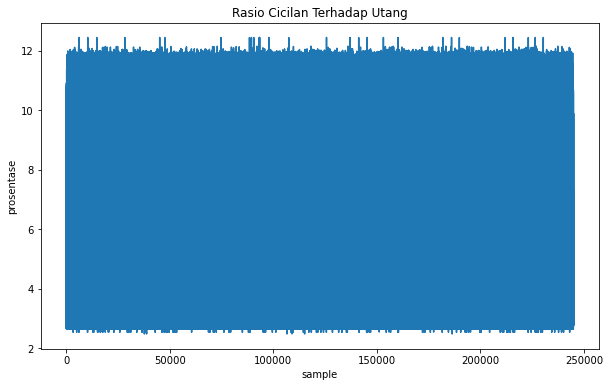

None

rasio terkecil : 2.47 %
rasio terbesar : 12.44 %


In [117]:
plt.figure(figsize=(10,6))
plt.plot(cicilan/utang*100)
plt.title('Rasio Cicilan Terhadap Utang')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(cicilan/utang*100),2),'%')
print('rasio terbesar :', round(max(cicilan/utang*100),2),'%')

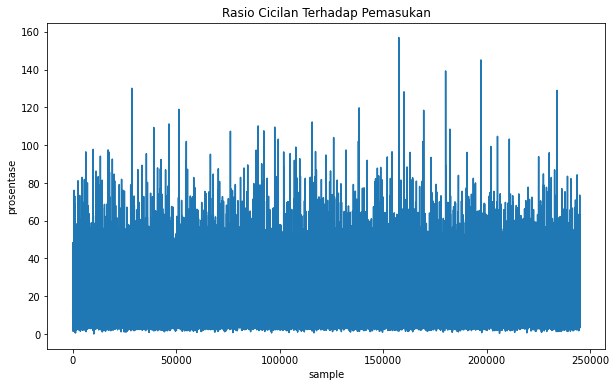

None

rasio terkecil : 0.02 %
rasio terbesar : 157.06 %


In [118]:
plt.figure(figsize=(10,6))
plt.plot(cicilan/pemasukan*100)
plt.title('Rasio Cicilan Terhadap Pemasukan')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(cicilan/pemasukan*100),2),'%')
print('rasio terbesar :', round(max(cicilan/pemasukan*100),2),'%')

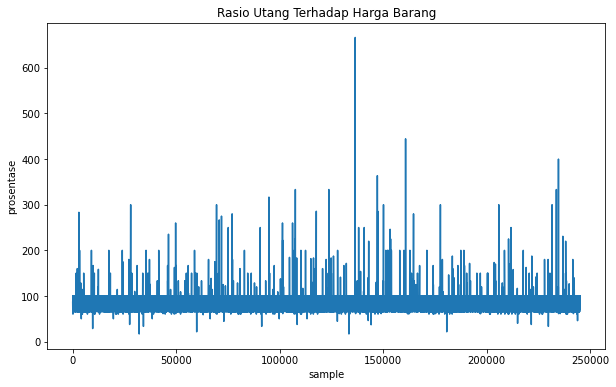

None

rasio terkecil : 16.67 %
rasio terbesar : 666.67 %


In [119]:
plt.figure(figsize=(10,6))
plt.plot(harga_barang/utang*100)
plt.title('Rasio Utang Terhadap Harga Barang')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(harga_barang/utang*100),2),'%')
print('rasio terbesar :', round(max(harga_barang/utang*100),2),'%')

### MULTIVARIATE ANALISYS

##### 1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

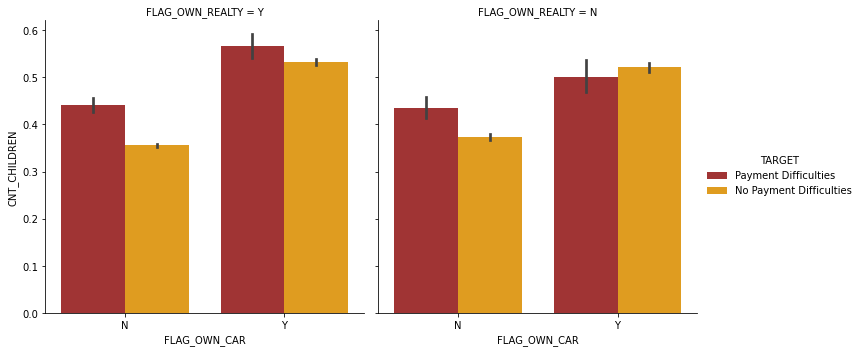

In [138]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)
plt.show()

Klien yang memiliki mobil dan rumah/rusun memiliki masalah dalam membayar kembali pinjaman untuk jumlah anak yang tinggi dibandingkan dengan klien yang tidak memiliki rumah/rusun.

##### 2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

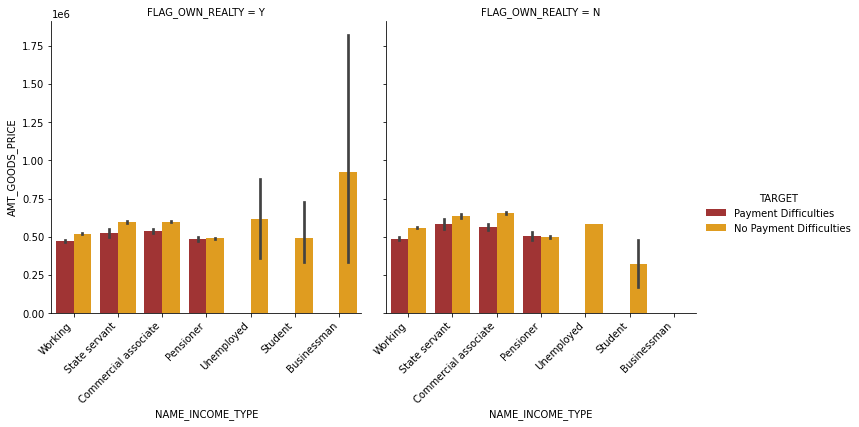

In [139]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien dengan jenis pendapatan cuti hamil di FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/flat) memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan ketika FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/flat).

##### 3. Family Status, Amount of Income, Target, and House/Flat Ownership Status

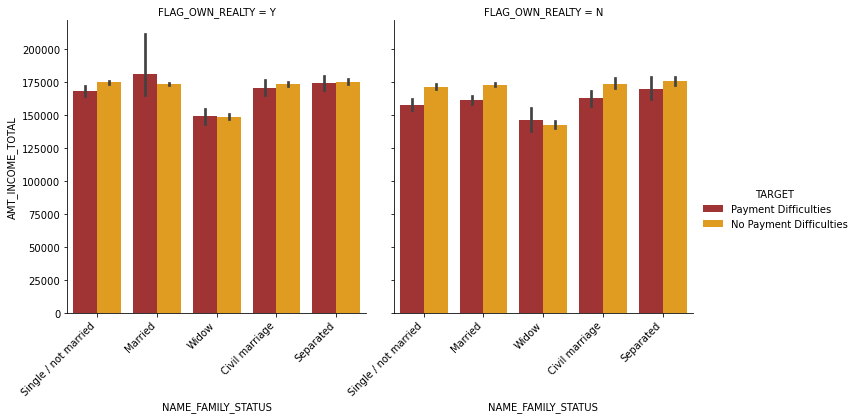

In [140]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_REALTY', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang sudah menikah dan memiliki rumah/rusun (FLAG_OWN_REALTY = Ya) memiliki masalah dalam pembayaran kembali pinjaman untuk pendapatan menengah dibandingkan ketika klien tidak memiliki rumah/rusun (FLAG_OWN_REALTY = Tidak).

#### Grouped by Car Ownership Status

##### 1. Contract Type, The Number of Children, Target, and Car Ownership Status

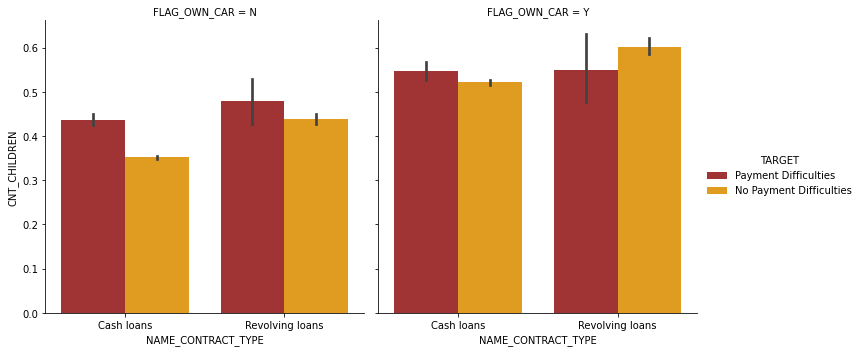

In [143]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN', 
            hue = 'TARGET', 
            col = 'FLAG_OWN_CAR', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)
plt.show()

Untuk pinjaman bergulir di FLAG_OWN_CAR = Tidak (yaitu tidak memiliki mobil) memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan ketika FLAG_OWN_CAR = Ya (yaitu memiliki mobil).


##### Grouped by Contract Type

##### 1. Income Type, Amount of Credit, Target, and Contract Type


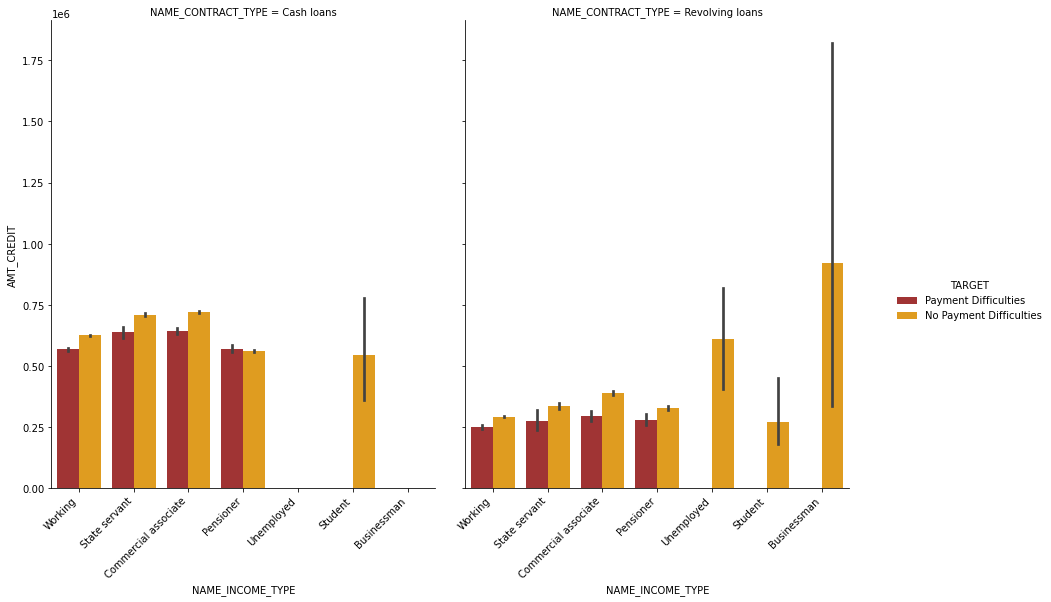

In [144]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()



Untuk jenis pendapatan cuti hamil dengan pinjaman tunai, semua klien memiliki masalah membayar kembali pinjaman untuk jumlah pinjaman kredit menengah. Sementara semua klien dengan cuti hamil dan pinjaman bergulir tidak mengalami kesulitan membayar kembali pinjaman.

Untuk klien menganggur dengan pinjaman tunai, lebih dari 50% klien memiliki masalah membayar kembali pinjaman dengan jumlah kredit menengah dari pinjaman. Sementara semua klien yang menganggur dengan pinjaman bergulir tidak mengalami kesulitan membayar kembali pinjaman.

Semua klien mahasiswa tidak mengalami kesulitan membayar kembali pinjaman baik dengan pinjaman tunai atau pinjaman bergulir untuk jumlah kredit rendah hingga menengah pinjaman.



##### Grouped by Rating of Region where Client Lives

##### 1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives


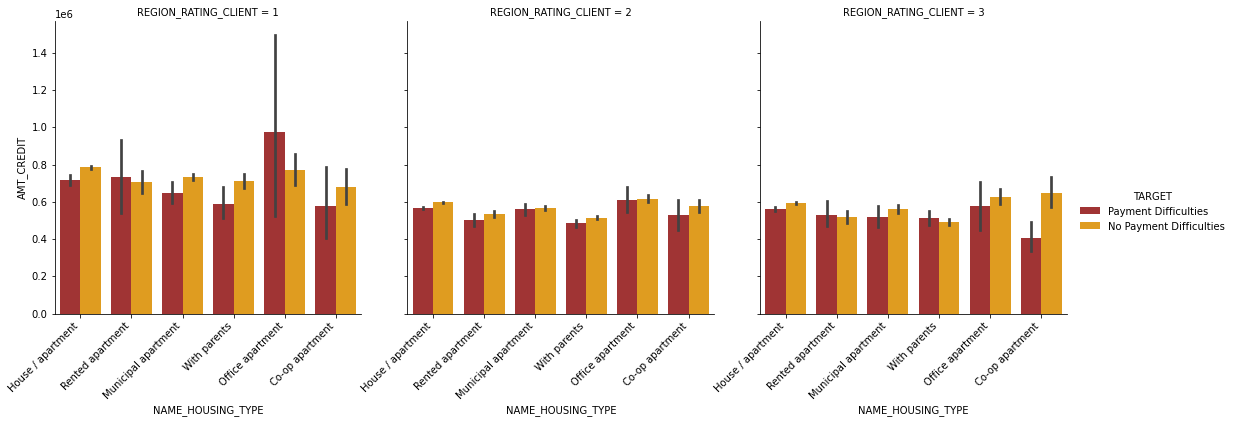

In [145]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang tinggal di apartemen sewaan dan apartemen kantor dan wilayahnya memiliki peringkat 1, memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan klien di wilayah dengan peringkat 2 untuk jumlah kredit menengah dari pinjaman.

##### 2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

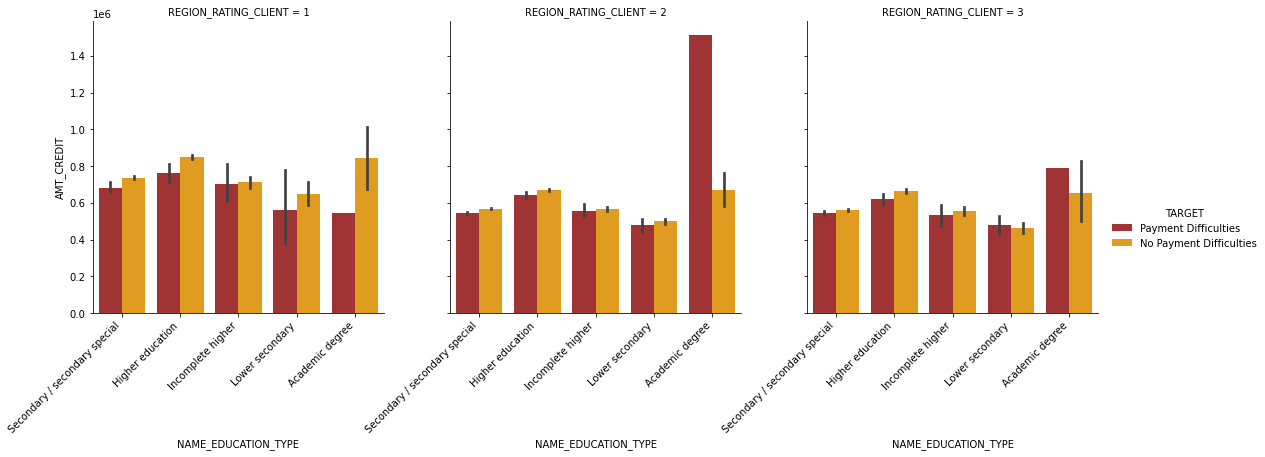

In [146]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan rating 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit yang lebih tinggi. Dan, klien dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah membayar kembali pinjaman untuk kredit pinjaman dalam jumlah sedang.

##### 3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

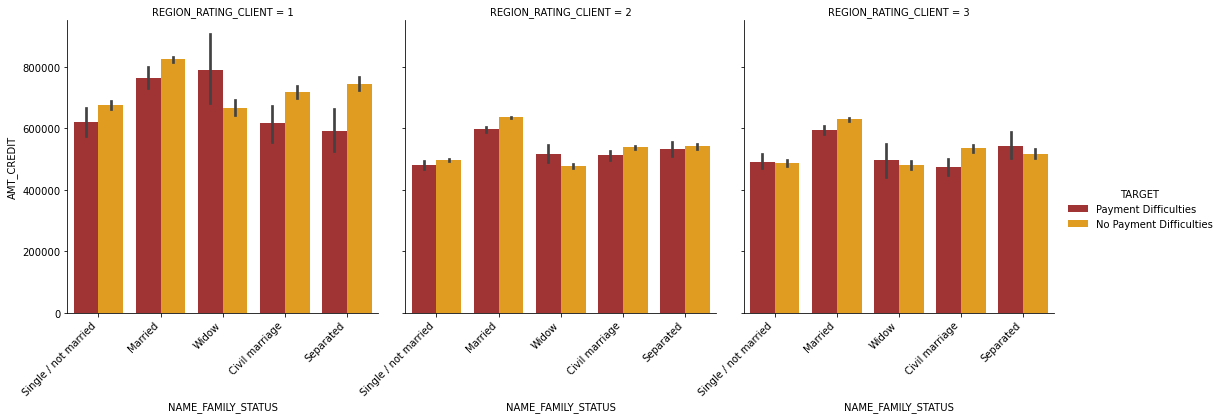

In [147]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', 
            kind = 'bar', palette= ['firebrick', 'orange'],
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()



Nasabah yang berstatus janda, baik yang berdomisili di wilayah dengan peringkat 1, 2, atau 3, mengalami kesulitan dalam melunasi pinjaman untuk kredit pinjaman dalam jumlah sedang hingga tinggi.

Klien yang memiliki status keluarga terpisah, dan tinggal di wilayah dengan peringkat 3, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang moderat dibandingkan dengan klien yang tinggal di wilayah dengan peringkat 1 atau 2.
